决策树是我们常用也很容易理解的机器学习算法，目前我们所用于可视化决策树的包主要是*graphviz*，可视化效果比较丑；以及基于graphviz的*dtreeviz*，可视化效果很不错，有直方图+饼图，但是安装都很麻烦。  
最近在做策略时，很多都是基于决策树生成规则，但是同时也需要可视化看下效果，周末花时间写了这个函数，看起来效果还不错。目前主要实现了分类决策树的可视化效果。欢迎大家star：https://github.com/suyin1203/dtreeplot   

如图：

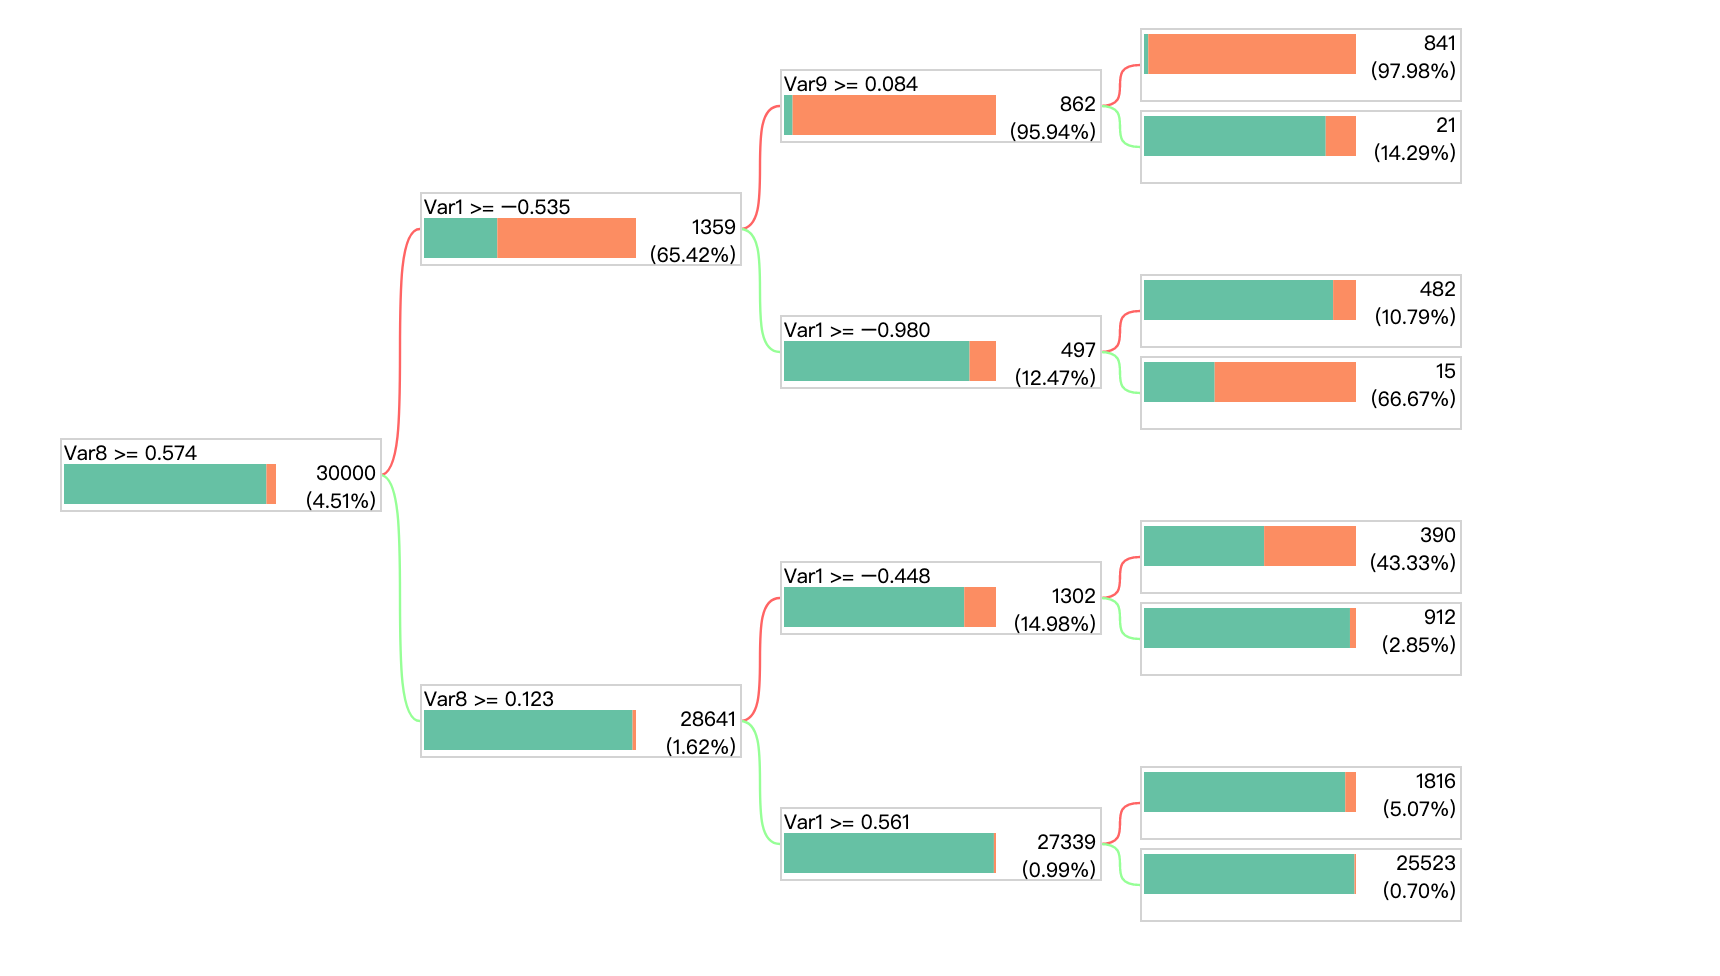


***Reference***：
- *[decision-forests](https://github.com/tensorflow/decision-forests/)*

- *[Titanic Decision Tree Visual with D3.js](https://www.kaggle.com/bhavesh09/titanic-decision-tree-visual-with-d3-js)*

### 安装  
使用pip安装  

In [60]:
# !pip3 install dtreeplot

# !pip3 install -i https://pypi.python.org/simple dtreeplot --upgrade


In [34]:
# 导入model_plot函数
from dtreeplot import model_plot

In [35]:
help(model_plot)

Help on function model_plot in module dtreeplot.plot:

model_plot(model, features, labels, width=950, height=350, show_notebook=True)
    Plots a decision tree structure in Jupyter notebook.
    
    Parameters
    ----------
    model: DecisionTreeClassifier
        A tree that has already been fit.
    features: lists of str
        The names of the features and labels, respectively.
    labels: lists of str
        The names of the features and labels, respectively.
    width: number
        The width of HTML element in notebook. eg.950
    height: number
        The height of HTML element in notebook. eg.350
    show_notebook: True or False
        If True, plot displayed in the notebook. If False, return file name.
    
    Returns:
      A Notebook HTML element showing the model.



#### 生成随机二分类数据集

In [55]:
# 使用
from dtreeplot import model_plot

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 

X, y = datasets.make_classification(n_samples=30000, 
                                    n_features=10, 
                                    weights=[0.96, 0.04], 
                                    random_state=5)
features = [f'Var{i+1}' for i in range(X.shape[1])]


clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=3, 
                             min_samples_split=30, 
                             min_samples_leaf=10, 
                             random_state=1234)
model = clf.fit(X, y)

model_plot(model, features, labels=y, height=530)

In [59]:
import pandas as pd  
df = pd.DataFrame(X, columns=features)
df['y'] = y
print('Var6>=0.604的数量:', df[df.Var6 >= 0.604].shape[0])

Var6>=0.604的数量: 1309


**应用*model_plot*函数后，会在当前目录文件下生生一个*tree_plot*开头的html文件，正常是加载到notebook显示，也可以点击打开。**  
决策树上方节点是父节点结果为**True/Yes**的结果。  
每个节点右边数字是当前节点样本数。  
括号内百分比是当前节点负样本（class 1）占比，对于分类数大于2的模型，占比代表最后一类样本占比。

#### 可视化iris数据集

In [61]:
# import dtreeplot package model_plot function
from dtreeplot import model_plot

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 

iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names

clf = DecisionTreeClassifier(max_depth=3, random_state=1234)
model = clf.fit(X, y)

# visualize tree model
model_plot(model, features, labels=y, height=300)


欢迎大家star：https://github.com/suyin1203/dtreeplot   
欢迎赞赏：  
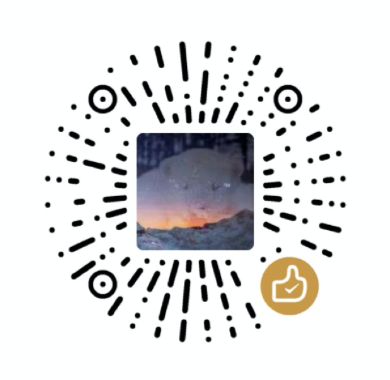